In [11]:
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
K = 3
cnn_acc_list, cnn_roc_list, cnn_pr_list = [], [], []
gvae_acc_list, gvae_roc_list, gvae_pr_list = [], [], []
mlvae_acc_list, mlvae_roc_list, mlvae_pr_list = [], [], []
clearvae_acc_list, clearvae_roc_list, clearvae_pr_list = [], [], []

for file_name in os.listdir("../expr_output/cmnist/classification"):
    if file_name.startswith(f"cmnist-k{K}") and file_name.endswith(".json"):
        with open(f"../expr_output/cmnist/classification/{file_name}", "r") as f:
            data = json.load(f)
            cnn_acc_list.append(data["cnn"]["acc"])
            cnn_pr_list.append(data["cnn"]["pr"]["overall"])
            cnn_roc_list.append(data["cnn"]["roc"]["overall"])

            gvae_acc_list.append(data["gvae + mlp"]["acc"])
            gvae_pr_list.append(data["gvae + mlp"]["pr"]["overall"])
            gvae_roc_list.append(data["gvae + mlp"]["roc"]["overall"])

            mlvae_acc_list.append(data["ml-vae + mlp"]["acc"])
            mlvae_pr_list.append(data["ml-vae + mlp"]["pr"]["overall"])
            mlvae_roc_list.append(data["ml-vae + mlp"]["roc"]["overall"])

            clearvae_acc_list.append(data["clear-vae + mlp"]["acc"])
            clearvae_pr_list.append(data["clear-vae + mlp"]["pr"]["overall"])
            clearvae_roc_list.append(data["clear-vae + mlp"]["roc"]["overall"])

df = pd.DataFrame(
    {
        "acc": cnn_acc_list + gvae_acc_list + mlvae_acc_list + clearvae_acc_list,
        "roc": cnn_roc_list + gvae_roc_list + mlvae_roc_list + clearvae_roc_list,
        "pr": cnn_pr_list + gvae_pr_list + mlvae_pr_list + clearvae_pr_list,
        "model": ["cnn"] * len(cnn_acc_list)
        + ["gvae"] * len(gvae_acc_list)
        + ["mlvae"] * len(mlvae_acc_list)
        + ["clearvae"] * len(clearvae_acc_list),
    }
)
df["K"] = K

rel_df = pd.DataFrame(
    {
        "acc": (np.array(gvae_acc_list) / np.array(cnn_acc_list)).tolist()
        + (np.array(mlvae_acc_list) / np.array(cnn_acc_list)).tolist()
        + (np.array(clearvae_acc_list) / np.array(cnn_acc_list)).tolist(),
        "roc": (np.array(gvae_roc_list) / np.array(cnn_roc_list)).tolist()
        + (np.array(mlvae_roc_list) / np.array(cnn_roc_list)).tolist()
        + (np.array(clearvae_roc_list) / np.array(cnn_roc_list)).tolist(),
        "pr": (np.array(gvae_pr_list) / np.array(cnn_pr_list)).tolist()
        + (np.array(mlvae_pr_list) / np.array(cnn_pr_list)).tolist()
        + (np.array(clearvae_pr_list) / np.array(cnn_pr_list)).tolist(),
        "model": ["gvae"] * len(gvae_acc_list)
        + ["mlvae"] * len(mlvae_acc_list)
        + ["clearvae"] * len(clearvae_acc_list),
    }
)
rel_df["K"] = K

In [3]:
def generate_df(K, dataset):
    cnn_acc_list, cnn_roc_list, cnn_pr_list = [], [], []
    gvae_acc_list, gvae_roc_list, gvae_pr_list = [], [], []
    mlvae_acc_list, mlvae_roc_list, mlvae_pr_list = [], [], []
    clearvae_acc_list, clearvae_roc_list, clearvae_pr_list = [], [], []

    for file_name in os.listdir(f"../expr_output/{dataset}/classification"):
        if file_name.startswith(f"{dataset}-k{K}") and file_name.endswith(".json"):
            with open(f"../expr_output/{dataset}/classification/{file_name}", "r") as f:
                data = json.load(f)
                cnn_acc_list.append(data["cnn"]["acc"])
                cnn_pr_list.append(data["cnn"]["pr"]["overall"])
                cnn_roc_list.append(data["cnn"]["roc"]["overall"])

                gvae_acc_list.append(data["gvae + mlp"]["acc"])
                gvae_pr_list.append(data["gvae + mlp"]["pr"]["overall"])
                gvae_roc_list.append(data["gvae + mlp"]["roc"]["overall"])

                mlvae_acc_list.append(data["ml-vae + mlp"]["acc"])
                mlvae_pr_list.append(data["ml-vae + mlp"]["pr"]["overall"])
                mlvae_roc_list.append(data["ml-vae + mlp"]["roc"]["overall"])

                clearvae_acc_list.append(data["clear-vae + mlp"]["acc"])
                clearvae_pr_list.append(data["clear-vae + mlp"]["pr"]["overall"])
                clearvae_roc_list.append(data["clear-vae + mlp"]["roc"]["overall"])

    df = pd.DataFrame(
        {
            "acc": cnn_acc_list + gvae_acc_list + mlvae_acc_list + clearvae_acc_list,
            "roc": cnn_roc_list + gvae_roc_list + mlvae_roc_list + clearvae_roc_list,
            "pr": cnn_pr_list + gvae_pr_list + mlvae_pr_list + clearvae_pr_list,
            "model": ["cnn"] * len(cnn_acc_list)
            + ["gvae"] * len(gvae_acc_list)
            + ["mlvae"] * len(mlvae_acc_list)
            + ["clearvae"] * len(clearvae_acc_list),
        }
    )
    df["K"] = K

    rel_df = pd.DataFrame(
        {
            "acc": (np.array(gvae_acc_list) / np.array(cnn_acc_list)).tolist()
            + (np.array(mlvae_acc_list) / np.array(cnn_acc_list)).tolist()
            + (np.array(clearvae_acc_list) / np.array(cnn_acc_list)).tolist(),
            "roc": (np.array(gvae_roc_list) / np.array(cnn_roc_list)).tolist()
            + (np.array(mlvae_roc_list) / np.array(cnn_roc_list)).tolist()
            + (np.array(clearvae_roc_list) / np.array(cnn_roc_list)).tolist(),
            "pr": (np.array(gvae_pr_list) / np.array(cnn_pr_list)).tolist()
            + (np.array(mlvae_pr_list) / np.array(cnn_pr_list)).tolist()
            + (np.array(clearvae_pr_list) / np.array(cnn_pr_list)).tolist(),
            "model": ["gvae"] * len(gvae_acc_list)
            + ["mlvae"] * len(mlvae_acc_list)
            + ["clearvae"] * len(clearvae_acc_list),
        }
    )
    rel_df["K"] = K

    return rel_df

In [14]:
dfs = []
for i in range(1, 6):
    dfs.append(generate_df(i, "cmnist"))
df = pd.concat(dfs)

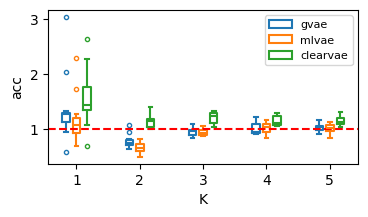

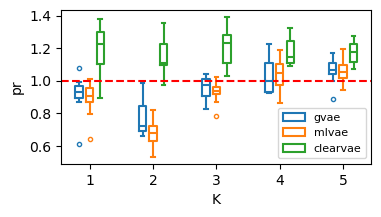

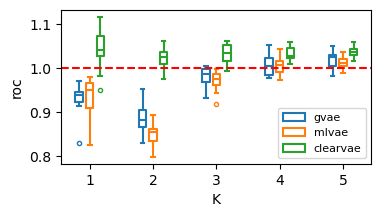

In [39]:
plt.subplots(figsize=(4, 2))
sns.boxplot(data=df, x="K", y="acc", hue="model", width=0.5, fill=False, gap=0.3,
            flierprops={'marker': 'o', 'markersize': 3})
plt.axline(xy1=(0, 1), slope=0, color='r', linestyle='--')
plt.legend(fontsize=8, title="")
plt.show()

plt.subplots(figsize=(4, 2))
sns.boxplot(data=df, x="K", y="pr", hue="model", width=0.5, fill=False, gap=0.3,
            flierprops={'marker': 'o', 'markersize': 3})
plt.axline(xy1=(0, 1), slope=0, color='r', linestyle='--')
plt.legend(fontsize=8, title="")
plt.show()

plt.subplots(figsize=(4, 2))
sns.boxplot(data=df, x="K", y="roc", hue="model", width=0.5, fill=False, gap=0.3,
            flierprops={'marker': 'o', 'markersize': 3})
plt.axline(xy1=(0, 1), slope=0, color='r', linestyle='--')
plt.legend(fontsize=8, title="")
plt.show()